# DMR: поиск дифференциально метилированных регионов

Была выбрана библиотека bsseq - https://www.bioconductor.org/packages/devel/bioc/vignettes/bsseq/inst/doc/bsseq.html.

Я использую R такой версии:

In [1]:
R.Version()$version.string

[1] "R version 4.2.1 (2022-06-23 ucrt)"

Использовать ту же версию может быть важно для одинаковой работы пакетов.

In [4]:
library(bsseq)

Сделаем рабочей директорию с cov-файлами, которые получили в результате работы Bismark:

In [5]:
setwd("D:/current_work/POLY/НИР/bismark")

Работаем с данными бисульфитного секвенирования двух диких сортов и одного элитного сорта:

| BS | WGS   | Accession name | Тип генотипа |
| -- |:-----:|:--------------:|-------------:|
| n1 | d_1   | TR83005        | Дикий вид, Kalkan_064 |
| n3 | d_3   | TR83052        | Дикий вид , Derei_070 |
| n4 | n_308 | ICCV96029      | Элитный сорт |


Для каждого сорта имеем по три биологических репликата, что обозначается так: n<номер сорта>_<номер репликата>. То есть, n4_2 соответствует второму репликату сорта 4, который, как видим по табличке сверху, является элитным.

Замечу, что постфикс _1 в названии выходных файлов Bismark не имеет смысловой нагрузки, такое имя было выбрано программой автоматически при обработке парных ридов.

Итак, для выявления дифференциальной метиляции нужно попарно сравнить репликаты первого дикого сорта(n1) c репликатами элитного(n4), а также репликаты второго дикого сорта(n1) c репликатами элитного(n4). Создаем такие группы для последующего анализа:

TODO: возмножно, имело смысл сравнить и два диких сорта между собой, но пока это не сделано.

# Загружаем bismark.cov.gz данные о покрытии для обработки библиотекой bsseq

In [6]:
samples_1vs4 = c(
    "n1_1_1_bismark_bt2_pe.deduplicated.bismark.cov.gz",
    "n1_2_1_bismark_bt2_pe.deduplicated.bismark.cov.gz",
    "n1_3_1_bismark_bt2_pe.deduplicated.bismark.cov.gz",
    "n4_1_1_bismark_bt2_pe.deduplicated.bismark.cov.gz",
    "n4_2_1_bismark_bt2_pe.deduplicated.bismark.cov.gz",
    "n4_3_1_bismark_bt2_pe.deduplicated.bismark.cov.gz"
    )
samples_3vs4 = c(
    "n3_1_1_bismark_bt2_pe.deduplicated.bismark.cov.gz",
    "n3_2_1_bismark_bt2_pe.deduplicated.bismark.cov.gz",
    "n3_3_1_bismark_bt2_pe.deduplicated.bismark.cov.gz",
    "n4_1_1_bismark_bt2_pe.deduplicated.bismark.cov.gz",
    "n4_2_1_bismark_bt2_pe.deduplicated.bismark.cov.gz",
    "n4_3_1_bismark_bt2_pe.deduplicated.bismark.cov.gz"
    )

Многие операции выполняются долго, поэтому для более быстрого страрта при перезапуске jupyter notebook'а я сохраняю промежуточные результаты в бинарные файлы с расширением .rds, их можно потом прочитать прямо стурктуру данных языка R, аналогичную той, из которой они были созданы.

Здесь и далее код клеток с долго выполняющимися операциями закомментирован. Если Вы хотите перезаписать запомненные файлы, то раскомментируйте код, выделив и нажав ctrl+/, и запустите её.

In [7]:
# bsseq_1vs4 <- bsseq::read.bismark(samples_1vs4)
# bsseq_3vs4 <- bsseq::read.bismark(samples_3vs4)
# colnames(bsseq_1vs4) <- c('n1_1','n1_2','n1_3','n4_1', 'n4_2', 'n4_3')
# colnames(bsseq_3vs4) <- c('n3_1','n3_2','n3_3','n4_1', 'n4_2', 'n4_3')

# saveRDS(bsseq_1vs4, "bsseq_1vs4.rds")
# saveRDS(bsseq_3vs4, "bsseq_3vs4.rds")

In [7]:
bsseq_1vs4 = readRDS("bsseq_1vs4.rds")
bsseq_3vs4 = readRDS("bsseq_3vs4.rds")

# Поиск DMR с использованием сглаживающего алгоритма BSmooth в bsseq

Я сделала этот этап, следуя гайду по пакету, однако, вчитавшись в описание поняла, что заданные по умолчанию параметры подобраны авторами для человеческого генома и могут дать некорректные результаты для геномов, далеких от людского.

Полагаю, имеет смысл приглядеться к другим пакетам для поиска DMR, а не пытаться подобрать параметры самостоятельно, так как, пытаясь это сделать, я сталкнулась с трудностями при поиске рекомендаций для выбора.


Проведем сглаживание:

In [9]:
# smoothed_bsseq_1vs4 = BSmooth(bsseq_1vs4)
# smoothed_bsseq_3vs4 = BSmooth(bsseq_3vs4)

# saveRDS(smoothed_bsseq_1vs4, "smoothed_bsseq_1vs4.rds")
# saveRDS(smoothed_bsseq_3vs4, "smoothed_bsseq_3vs4.rds")

In [8]:
smoothed_bsseq_1vs4 = readRDS("smoothed_bsseq_1vs4.rds")
smoothed_bsseq_3vs4 = readRDS("smoothed_bsseq_3vs4.rds")

T-test на сглаженных данных:

In [12]:
# t_test_smoothed_bsseq_1vs4 = BSmooth.tstat(smoothed_bsseq_1vs4,c('n1_1','n1_2','n1_3'), c('n4_1', 'n4_2', 'n4_3'))
# t_test_smoothed_bsseq_3vs4 = BSmooth.tstat(smoothed_bsseq_3vs4,c('n3_1','n3_2','n3_3'), c('n4_1', 'n4_2', 'n4_3'))
# stats_t_test_1vs4 = getStats(t_test_smoothed_bsseq_1vs4)
# stats_t_test_3vs4 = getStats(t_test_smoothed_bsseq_3vs4)

# saveRDS(t_test_smoothed_bsseq_1vs4, "t_test_smoothed_bsseq_1vs4.rds")
# saveRDS(t_test_smoothed_bsseq_3vs4, "t_test_smoothed_bsseq_3vs4.rds")

In [9]:
t_test_smoothed_bsseq_1vs4 = readRDS("t_test_smoothed_bsseq_1vs4.rds")
t_test_smoothed_bsseq_3vs4 = readRDS("t_test_smoothed_bsseq_3vs4.rds")

Найдем дифференциально метилированные регионы с помощью функции.

-  dmrFinder(bstat, cutoff = NULL, qcutoff = c(0.025, 0.975), maxGap=300, stat = "tstat.corrected", verbose = TRUE)
- Finds differentially methylated regions for whole genome bisulfite sequencing data. Essentially identifies regions of the genome where all methylation loci have an associated t-statistic that is beyond a (low, high) cutoff.

In [14]:
# DMRs_1vs4 = dmrFinder(t_test_smoothed_bsseq_1vs4,cutoff = 4)
# DMRs_3vs4 = dmrFinder(t_test_smoothed_bsseq_3vs4,cutoff = 4)

# saveRDS(DMRs_1vs4, "DMRs_1vs4.rds")
# saveRDS(DMRs_3vs4, "DMRs_3vs4.rds")

In [10]:
DMRs_1vs4 = readRDS("DMRs_1vs4.rds")
DMRs_3vs4 = readRDS("DMRs_3vs4.rds")

Note that post-processing of these DMRs are likely to be necessary, filtering for example for length (or number of loci).

https://rdrr.io/bioc/bsseq/man/dmrFinder.html

Гистограммы длин DMR:

In [11]:
head(DMRs_1vs4)

,chr,start,end,idxStart,idxEnd,cluster,n,width,invdensity,areaStat,maxStat,meanDiff,group1.mean,group2.mean,tstat.sd,direction
,<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2237,Ca1,34595038,34598761,753013,753206,18716,194,3724,19.19588,3353.933,22.164614,0.7840990,0.933519062,0.14942002,0.04516914,hyper
12360,Ca5,6379137,6380809,3985957,3986077,98628,121,1673,13.82645,2504.850,21.681312,0.9255879,0.937526660,0.01193871,0.04495044,hyper
39939,Ca5,22691330,22693397,4310404,4310563,106227,160,2068,12.92500,-2369.658,-4.047978,-0.7184994,0.006044261,0.72454366,0.04614278,hypo
24213,scaffold336,410461,411270,8128917,8128982,197702,66,810,12.27273,2198.696,37.302718,0.8486916,0.892943291,0.04425167,0.02611128,hyper
17681,Ca6,32880928,32884968,5644767,5644929,137956,163,4041,24.79141,2138.983,16.213877,0.7328763,0.782158296,0.04928201,0.05093546,hyper
2249,Ca1,34860534,34863945,759699,759798,18847,100,3412,34.12000,2044.342,22.144673,0.8791584,0.938785717,0.05962735,0.04186337,hyper


- как считать длину? как заданы границы - [] или [)?
  * width - длина
- как bsseq выбирал hypo и hyper?
- чем отличается start, end от inxStart, idxEnd?

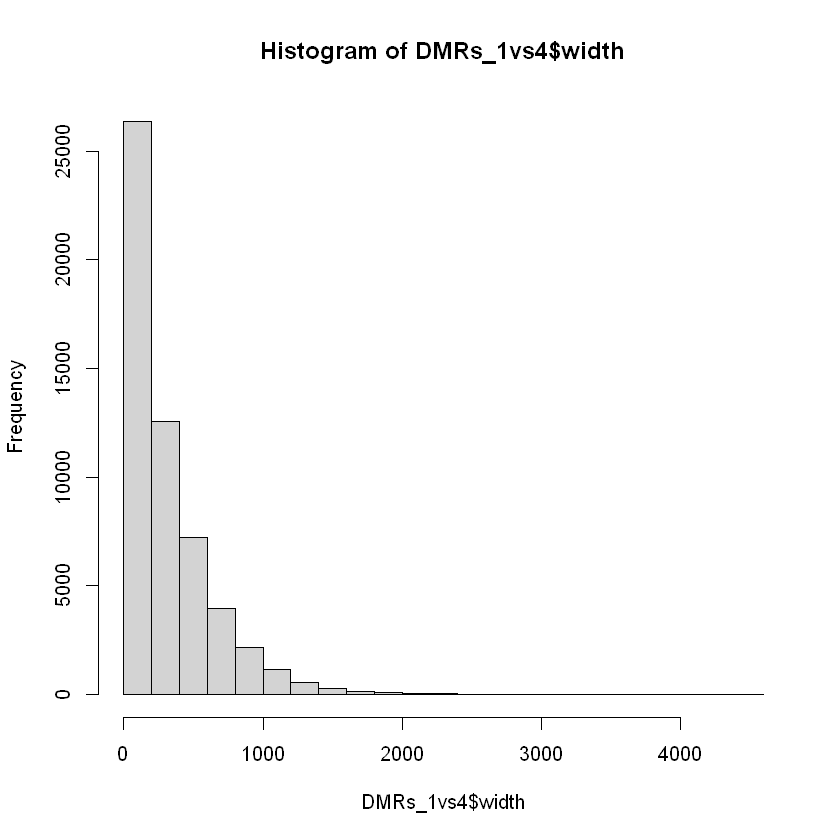

In [7]:
hist(DMRs_1vs4$width)

What is a DMR of length 1?

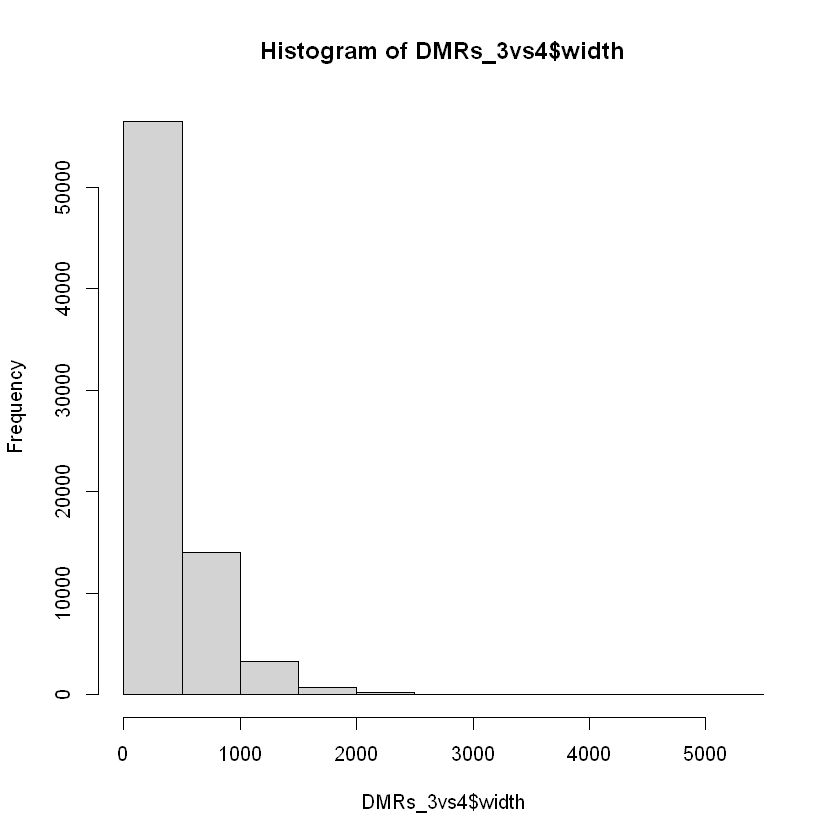

In [8]:
hist(DMRs_3vs4$width)

In [19]:
png(filename="smoothed_bsseq_1vs4.png")
plotRegion(smoothed_bsseq_1vs4, region=GRanges(seqnames="Ca1", IRanges(6909000,7000000)), col=c(1,1,2,2))
dev.off()

png 
  2

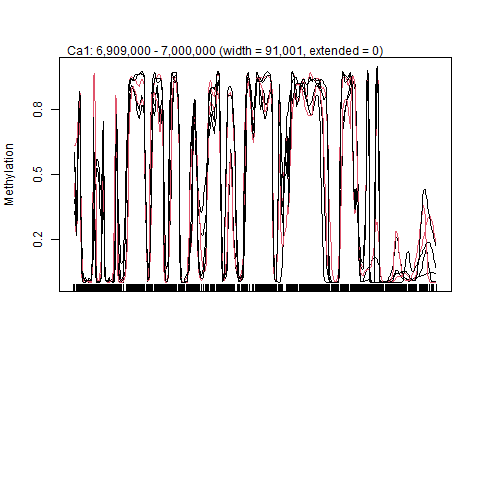

In [14]:
library("IRdisplay")
display_png(file="D:/current_work/POLY/НИР/bismark/smoothed_bsseq_1vs4.png")

И непонятно, насколько хорошо такое сглаживание?